# **MÓDULO 21 - Projeto de Credit Score - Árvore de Decisão**


No módulo 17, vocês realizaram a primeira etapa do projeto de crédito de vocês. Então fizeram o tratamendo dos dados, balancearam as classes, transformaram as variáveis categóricas e separam base de treino e teste. Já no módulo 14, aplicaram a base já tratada o algoritmo de Naive Bayes, onde avaliaram os resultados das previsões. Nesse módulo aplicaremos a nossa base o algoritmo da árvore de decisão.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1) Comece carregando as bases de treino (X e y) e teste (X e y).
Verifique se o número de linhas condiz, se as variáveis estão corretas sendo apenas a de score para y e as demais nas bases de X e por último, se Y está balanceada no teste.

In [2]:
# Divide the data into training and testing
X_train = pd.read_csv('X_train_balanced.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train_balanced.csv')
y_test = pd.read_csv('y_test.csv')

# 2) Explique com suas palavras, qual o passo a passo para a aplicação do algoritmo da árvore de decisão, não esqueça de citar a etapa de avaliação do modelo e também como podemos melhorar nosso modelo.

In [3]:
# O algoritmo de árvore de decisão segue um passo a passo bem estruturado para classificar ou prever valores com base em um conjunto de dados. Os principais passos incluem:

    # Coleta e preparação dos dados: O primeiro passo é reunir os dados, realizar limpeza (remoção de valores nulos, tratamento de outliers) e organizar as variáveis preditoras e a variável-alvo.
    # Divisão do conjunto de dados: O dataset é dividido em conjunto de treino e teste (por exemplo, 80% para treino e 20% para teste) para garantir que o modelo seja avaliado corretamente.
    # Escolha do critério de divisão: A árvore de decisão usa métricas, como Gini, para decidir quais atributos melhor separam os dados em cada nó.
    # Construção da árvore: O algoritmo divide os dados iterativamente, criando nós de decisão até atingir um critério de parada, como profundidade máxima da árvore ou um número mínimo de amostras por nó.
    # Podas e ajustes: Para evitar overfitting, é possível podar ramos irrelevantes, limitar a profundidade da árvore ou usar técnicas como pruning.
    # Avaliação do modelo: O modelo treinado é testado no conjunto de teste, avaliando métricas como acurácia, precisão, recall e F1-score.

# 3) Aplique o algortimo da árvore de decisão aos dados de treinamento, utilizando critério de Gini e random state = 0.
Traga a acurácia para o modedlo com os dados de treino.

In [6]:
arvore_credit = DecisionTreeClassifier (criterion = 'gini', random_state = 0)
arvore_credit.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

# 4) Aplique o modelo aos dados de teste e realize a avaliação dos resultados. Não se esqueça de avaliar com as suas palavras e comparar o desempenho da base treino com a teste.

In [7]:
previsoes = arvore_credit.predict(X_test)
relatorio = classification_report(y_test, previsoes)
print("Relatório de Classificação:")
print(relatorio)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.97      0.98        29
           2       1.00      1.00      1.00         6

    accuracy                           0.98        41
   macro avg       0.95      0.99      0.97        41
weighted avg       0.98      0.98      0.98        41



O relatório de classificação apresenta as métricas de precisão (precision), revocação (recall) e F1-score, que avaliam o desempenho do modelo para cada classe do score credit (provavelmente representadas por 0 = low, 1 = average, 2 = high).

Desempenho por classe:
- Classe 0 (low):
    - Precision = 0.86 → 86% dos exemplos classificados como low estavam corretos.
    - Recall = 1.00 → O modelo identificou corretamente todos os casos reais da classe low.
    - F1-score = 0.92 → Equilíbrio entre precisão e recall, indicando um bom desempenho geral.

- Classe 1 (average):
    - Precision = 1.00 → Todos os exemplos classificados como average estavam corretos
    - Recall = 0.97 → 97% dos exemplos reais de average foram corretamente identificados.- F1-score = 0.98 → Excelente equilíbrio entre precisão e recall.

- Classe 2 (high):
    - Precision, Recall e F1-score = 1.00 → O modelo classificou todos os casos high sem erros.

- **Métricas gerais:**
    - Accuracy (acurácia) = 0.98 → 98% das classificações foram corretas.
    - Macro avg (média das classes):
    - Recall de 0.99 → O modelo identificou quase todas as classes corretamente.
    - F1-score de 0.97 → Confirma um desempenho equilibrado entre todas as classes.

**Conclusão**
O modelo tem um desempenho excelente com alta precisão e recall em todas as classes. O único ponto de atenção é a classe low (0), onde a precisão é ligeiramente menor (0.86), indicando que pode haver algumas classificações erradas para essa categoria. 

# 5) Plote a árvore de decisão.
É possível fazer uma avaliação visual? Qual a profundidade da árvore?

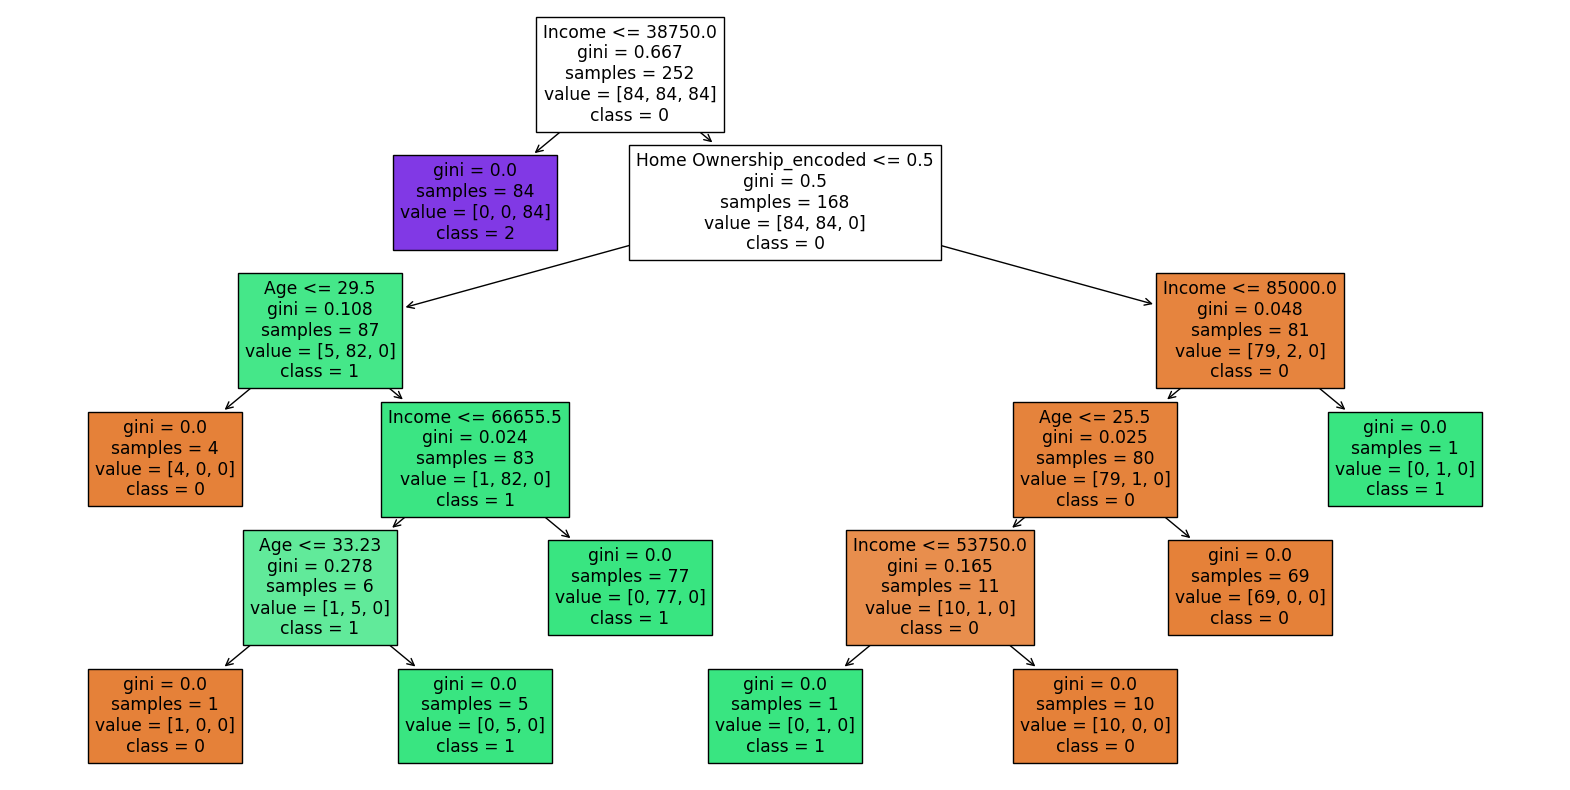

In [8]:
plt.figure(figsize=(20,10))
plot_tree(arvore_credit, filled=True, feature_names=X_train.columns, class_names=['0', '1', '2'])
plt.show()

# 6) Identifique as 2 principais features do modelo.


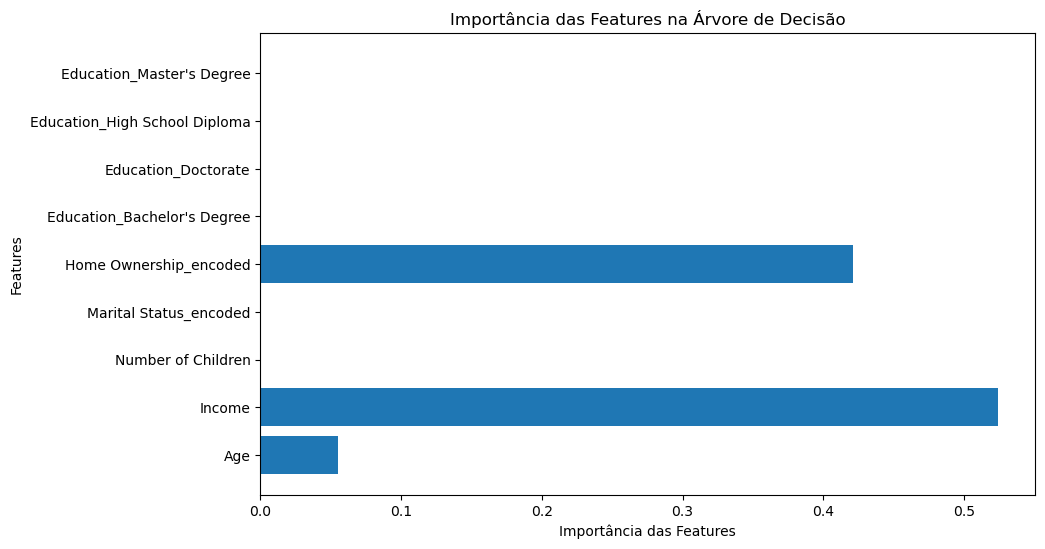

In [11]:
# Obtendo a importância das características do modelo de árvore de decisão
importancias_features = arvore_credit.feature_importances_

# Obtendo os nomes das características
nomes_features = X_train.columns

# Criando um gráfico de barras para visualizar a importância das características
plt.figure(figsize=(10, 6))
plt.barh(nomes_features, importancias_features)
plt.xlabel('Importância das Features')
plt.ylabel('Features')
plt.title('Importância das Features na Árvore de Decisão')
plt.show()

In [10]:
# As duas principais features do modelo podem ser identificadas observando os primeiros nós da árvore de decisão, pois essas variáveis são escolhidas inicialmente por serem as mais informativas para separar as classes.
# As duas primeiras divisões ocorrem com base nas seguintes variáveis:

# Income – Aparece no nó raiz, indicando que é a variável mais importante para a decisão inicial.
# Home Ownership – É a segunda divisão após o nó raiz, sugerindo que também tem grande influência na classificação.

# 7) Rode um modelo de árvore de decisão apenas com as 2 principais features encontradas. E avalie os resultados. Para você o desempenho da árvore está melhor que o modelo anterior? Justifique.

In [13]:
X_train_reduzido = X_train[['Income', 'Home Ownership_encoded']]
X_test_reduzido = X_test[['Income', 'Home Ownership_encoded']]

In [14]:
arvore_churn_reduzido = DecisionTreeClassifier (criterion = 'gini', random_state = 0)
arvore_churn_reduzido.fit(X_train_reduzido, y_train)

DecisionTreeClassifier(random_state=0)

In [15]:
previsoes_reduzido = arvore_churn_reduzido.predict(X_test_reduzido)

In [17]:
relatorio_reduzido = classification_report(y_test, previsoes_reduzido)
print("Relatório de Classificação Reduzido:")
print(relatorio_reduzido)

Relatório de Classificação Reduzido:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.97      0.97      0.97        29
           2       1.00      1.00      1.00         6

    accuracy                           0.95        41
   macro avg       0.93      0.93      0.93        41
weighted avg       0.95      0.95      0.95        41



Algumas métricas cairam de desempenho, porém já era esperado, pois retiramos uma das colunas.

# 8) Compare os resultados obtidos com a árvore de decisão com os resultados do Naive Bayes (Exercício módulo 20). Qual parece ter se adequado melhor aos dados e tem melhores resultados de avaliação? Justifique.

**Naive Bayes**
| Classe  | Precision | Recall | F1-Score | Support |
|---------|-----------|--------|----------|---------|
| 0       | 0.86      | 1.00   | 0.92     | 6       |
| 1       | 1.00      | 1.00   | 1.00     | 29      |
| 2       | 1.00      | 0.83   | 0.91     | 6       |
| **Accuracy**   | -        | -      | **0.98**  | 41      |
| **Macro Avg**  | 0.95     | 0.94   | 0.94     | 41      |
| **Weighted Avg** | 0.98  | 0.98   | 0.98     | 41      |

**Árvore de Decisão**
| Classe  | Precision | Recall | F1-Score | Support |
|---------|-----------|--------|----------|---------|
| 0       | 0.86      | 1.00   | 0.92     | 6       |
| 1       | 1.00      | 0.97   | 0.98     | 29      |
| 2       | 1.00      | 1.00   | 1.00     | 6       |
| **Accuracy**   | -        | -      | **0.98**  | 41      |
| **Macro Avg**  | 0.95     | 0.99   | 0.97     | 41      |
| **Weighted Avg** | 0.98  | 0.98   | 0.98     | 41      |


**Comparação entre Naive Bayes e Árvore de Decisão**  

Ambos os modelos apresentam uma **acurácia de 98%**, indicando que ambos têm um bom desempenho geral na classificação. No entanto, há algumas diferenças sutis nas métricas de **precisão, recall e f1-score** para cada classe.  

**1. Comparação por classe**  
- Para a **classe 0**, os dois modelos têm o mesmo desempenho (precision = 0.86, recall = 1.00, f1-score = 0.92).  
- Para a **classe 1**, o Naive Bayes tem um recall um pouco maior (1.00) comparado à Árvore de Decisão (0.97), mas ambos têm **f1-score** próximo de 1.00.  
- Para a **classe 2**, a Árvore de Decisão tem um recall perfeito (1.00), enquanto o Naive Bayes teve um recall menor (0.83), o que significa que o modelo Naive Bayes não conseguiu identificar todas as instâncias dessa classe corretamente.  

**2. Análise das médias**  
- **Macro Avg (média simples entre as classes)**  
  - O Naive Bayes obteve **recall = 0.94**, enquanto a Árvore de Decisão teve **recall = 0.99**, indicando que a Árvore de Decisão teve melhor desempenho na recuperação das classes.  
  - O f1-score também foi **ligeiramente maior na Árvore de Decisão (0.97) comparado ao Naive Bayes (0.94)**.  

- **Weighted Avg (média ponderada pelo número de amostras)**  
  - Ambos os modelos obtiveram **0.98 em todas as métricas**, indicando um desempenho bastante equilibrado considerando a distribuição das classes.  

**Conclusão: Qual modelo se adequou melhor?**  
A **Árvore de Decisão parece ter se adequado melhor aos dados**, pois:  
Possui **recall maior na classe 2**, indicando que identificou todas as instâncias corretamente.  
Tem **média macro maior em recall e f1-score**, sugerindo um desempenho ligeiramente superior.  
Ambos os modelos têm **acurácia idêntica**, mas a Árvore de Decisão tem métricas um pouco mais consistentes.  